In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample Distributions

There is a big difference between a estimator and a parameter. The parameters come from population while estimators come from a sample. 

### Simple Random Sample
Given a population $f(x)$ with mean $\mu$ and variance $\sigma^2$, we have a random sample of size $n$ that is a set of $n$ random variables $X_1, X_2, ... , X_n$ such as:
1. They are independent
2. Each random variable has a similar distribution $f(x)$

### Random Variable
It’s a function which performs the mapping of the outcomes of a random process to a numeric value. It has a distribution and this distribution dependes on $\mu$ and $\sigma$.

### Probability Density Function
$$f(x) = \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}$$

### Cumulative Distribution Function
$$F(x) = \int_{-\infty}^{x} \frac{e^{-(x - \mu)^{2}/(2\sigma^{2}) }} {\sigma\sqrt{2\pi}}$$

### CDF of the standard normal
$$\Phi(x)=P(Z \leq x)= \frac{1}{\sqrt{2 \pi}}  \int_{-\infty}^{x}\exp\left\{-\frac{u^2}{2}\right\} du.$$

If **$X$** is a normal random variable with mean $\mu$ and variance $\sigma^2$, i.e, $X∼N(\mu,\sigma^2)$, then

$$f_X(x)=\frac{1}{ \sigma\sqrt{2 \pi}} \exp\left\{-\frac{(x-\mu)^2}{2\sigma^2}\right\}$$
$$F_X(x)=P(X \leq x)=\Phi\left(\frac{x-\mu}{\sigma}\right)$$
$$P(a < X \leq b)= \Phi\left(\frac{b-\mu}{\sigma}\right)-\Phi\left(\frac{a-\mu}{\sigma}\right)$$

### Joint Probability Distribution
Two random variables $X$ and $Y$ are jointly continuous if there exists a nonnegative function $f_{XY}:\mathbb{R}^2 \rightarrow \mathbb{R}$, such that, for any set $A\in \mathbb{R}^2$, we have

$$
\begin{align}\label{eq:double-int}
  P\big((X,Y) \in A\big) =\iint \limits_A f_{XY}(x,y)dxdy \hspace{30pt}
\end{align}
$$

For iid (independent and identically distributed) random variables. 

$$
\begin{align}%\label{}
\nonumber  F_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n) & = F_{X_1}(x_1)F_{X_2}(x_2) \cdots F_{X_n}(x_n)\\
&= F_{X}^n
\end{align}
$$

### Sample Mean

The sample mean  $x$  is a random variable: it varies from sample to sample in a way that cannot be predicted with certainty. We will write  $\bar{X}$  when the sample mean is thought of as a random variable, and write  $x$  for the values that it takes. The random variable  $\bar{X}$  has a mean, denoted  $\mu_\bar{X}$ , and a standard deviation, denoted  $\sigma_\bar{X}$.

$$
\begin{align*} μ_{\bar{X}} &=\sum \bar{x} P(\bar{x}) 
\end{align*}
$$

Suppose random samples of size  $n$  are drawn from a population with mean  $\mu$  and standard deviation  $\sigma$ . The mean  $\mu_\bar{X}$  and standard deviation  $\sigma_\bar{X}$  of the sample mean $\bar{X}$  satisfy

$$
E(\bar{X}) =μ \label{average}
$$

$$
Var(\bar{X}) =\dfrac{σ^2}{n} \label{std}
$$

## Example

In [2]:
population = np.array([ 3 , 4 , 7, 9 , 12 ])

#### Statistics from population

In [4]:
mu_pop = np.mean(population)
var_pop = np.var(population)
print(mu_pop)
print(var_pop)

7.0
10.8


### Generating No Replacement Samples

In [5]:
samples_no_replacement = []
index_sample = 0 
for i in population:
    for j in population:
        if i != j:
            samples_no_replacement.append( (i , j) )

In [6]:
matrix_list = []

for lit_list in range(0, 22, 4):
    matrix_list.append( samples_no_replacement[lit_list:lit_list+4] )

matrix_list

[[(3, 4), (3, 7), (3, 9), (3, 12)],
 [(4, 3), (4, 7), (4, 9), (4, 12)],
 [(7, 3), (7, 4), (7, 9), (7, 12)],
 [(9, 3), (9, 4), (9, 7), (9, 12)],
 [(12, 3), (12, 4), (12, 7), (12, 9)],
 []]

In [7]:
matrix_samples = np.array(samples_no_replacement).reshape( 20 , 2)

In [8]:
means_samples = np.mean( matrix_samples , axis = 1 )

In [9]:
means = np.unique( means_samples , return_counts = True )[0]  
probability = np.unique( means_samples , return_counts = True )[1]  / means_samples.size

In [10]:
histogram_means = pd.DataFrame({ 'means' : means , 'f(x)' : probability  })

In [11]:
histogram_means

,means,f(x)
0,3.5,0.1
1,5.0,0.1
2,5.5,0.1
3,6.0,0.1
4,6.5,0.1
5,7.5,0.1
6,8.0,0.2
7,9.5,0.1
8,10.5,0.1


In [12]:
mean_of_means = means.reshape( 1, 9 ) @ probability.reshape( 9 , 1 )

In [13]:
var_of_means = probability.reshape( 1 , 9 ) @ (means.reshape(  9 , 1 )**2 ) - mean_of_means**2

In [14]:
var_of_means

array([[4.05]])

In [15]:
var_pop * ((5 - 2)/ (5-1)) / 2

4.050000000000001

### Generating Samples With Replacement 

In [111]:
samples_replacement = []
index_sample = 0 
for i in population:
    for j in population:
            samples_replacement.append( (i , j) )

In [116]:
matrix_list = []

for lit_list in range(0, 25, 5):
    matrix_list.append( samples_replacement[lit_list:lit_list+5] )

matrix_list

[[(3, 3), (3, 4), (3, 7), (3, 9), (3, 12)],
 [(4, 3), (4, 4), (4, 7), (4, 9), (4, 12)],
 [(7, 3), (7, 4), (7, 7), (7, 9), (7, 12)],
 [(9, 3), (9, 4), (9, 7), (9, 9), (9, 12)],
 [(12, 3), (12, 4), (12, 7), (12, 9), (12, 12)]]

In [118]:
matrix_samples = np.array(samples_replacement).reshape( 25 , 2)

In [120]:
means_samples = np.mean( matrix_samples , axis = 1 )

In [121]:
means = np.unique( means_samples , return_counts = True )[0]  
probability = np.unique( means_samples , return_counts = True )[1]  / means_samples.size

In [122]:
histogram_means = pd.DataFrame({ 'means' : means , 'f(x)' : probability  })

In [123]:
histogram_means

,means,f(x)
0,3.0,0.04
1,3.5,0.08
2,4.0,0.04
3,5.0,0.08
4,5.5,0.08
5,6.0,0.08
6,6.5,0.08
7,7.0,0.04
8,7.5,0.08
9,8.0,0.16


In [127]:
mean_of_means = means.reshape( 1, 14 ) @ probability.reshape( 14 , 1 )

In [128]:
var_of_means = probability.reshape( 1 , 14 ) @ (means.reshape(  14 , 1 )**2 ) - mean_of_means**2

In [129]:
var_of_means

array([[5.4]])

In [130]:
mean_of_means

array([[7.]])

In [131]:
var_pop  / 2

5.4

### Probability of $\bar{X}$ to be between 5 and 8

In [132]:
n = 36

In [135]:
mean_samples = mu_pop 

In [139]:
var_samples = var_pop / 36

media should be less than 8 and mayor 5

In [143]:
z_max = (8 - mean_samples)/ var_samples**0.5

In [144]:
z_min = (5 - mean_samples)/ var_samples**0.5

In [147]:
st.norm.cdf( z_max ) - st.norm.cdf( z_min )

0.9659250577526578

In [162]:
def draw_z_score(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.figure( figsize = ( 5 , 5 ) , dpi = 100 )
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

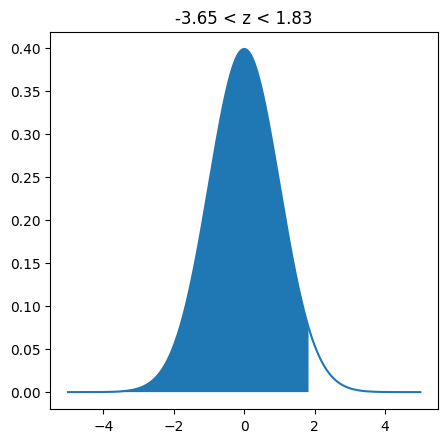

In [165]:
x = np.arange(-5,5,0.001)
draw_z_score(x, ( z_min < x) & (x < z_max ), 0, 1, f'{round(z_min, 2)} < z < { round(z_max, 2)}')